In [48]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/suvedharam/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


###Python Libraries Imports

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
filename = path+"/user_behavior_dataset.csv"
data = pd.read_csv(filename)



In [103]:
print(data.columns)
data.columns = ['user_id','device_model','operating_system','app_usage_time','screen_time','battery_drain','num_of_apps','data_usage','age','gender','user_behavior_class']
print(data.columns)
data = data.drop(['user_id'], axis=1)
print(data.columns)

Index(['user_id', 'device_model', 'operating_system', 'app_usage_time',
       'screen_time', 'battery_drain', 'num_of_apps', 'data_usage', 'age',
       'gender', 'user_behavior_class'],
      dtype='object')
Index(['user_id', 'device_model', 'operating_system', 'app_usage_time',
       'screen_time', 'battery_drain', 'num_of_apps', 'data_usage', 'age',
       'gender', 'user_behavior_class'],
      dtype='object')
Index(['device_model', 'operating_system', 'app_usage_time', 'screen_time',
       'battery_drain', 'num_of_apps', 'data_usage', 'age', 'gender',
       'user_behavior_class'],
      dtype='object')


Get Column Summary

In [107]:
def column_summary(df):
    result_df = pd.DataFrame(columns=['col_name', 'col_dtype', 'num_distinct_values','min_value', 'max_value','median_no_na', 'average_no_na','average_non_zero','null_present', 'nulls_num', 'non_nulls_num', 'distinct_values'])
    
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Get column dtype
        col_dtype = df[column].dtype

        # Get distinct values and their counts
        value_counts = df[column].value_counts()
        distinct_values = value_counts.index.tolist()

        # Get number of distinct values
        num_distinct_values = len(distinct_values)

        # Get min,max,median,average if value is number
        if np.issubdtype(df[column].dtype, np.number):
            # Get min and max values
            sorted_values = sorted(distinct_values)
            min_value = sorted_values[0] if sorted_values else None
            max_value = sorted_values[-1] if sorted_values else None

            # Get median value
            non_distinct_val_list = sorted(df[column].dropna().tolist())
            len_non_d_list = len(non_distinct_val_list)
            if len(non_distinct_val_list) == 0:
                median = None
            else:
                median = non_distinct_val_list[len_non_d_list//2]

            
            if len(non_distinct_val_list) > 0:
                average = sum(non_distinct_val_list)/len_non_d_list
                non_zero_val_list = [v for v in non_distinct_val_list if v > 0]
                average_non_zero = sum(non_zero_val_list)/len_non_d_list
            else:
                average = None
                average_non_zero = None
        else:
            min_value = None
            max_value = None
            median = None
            average = None
            average_non_zero = None

        # Check if null values are present
        null_present = 1 if df[column].isnull().any() else 0

        # Get number of nulls and non-nulls
        num_nulls = df[column].isnull().sum()
        num_non_nulls = df[column].notnull().sum()

        # Distinct_values only take top 10 distinct values count
        top_10_d_v = value_counts.head(10).index.tolist()
        top_10_c = value_counts.head(10).tolist()
        top_10_d_v_dict = dict(zip(top_10_d_v,top_10_c))

        # Append the information to the result DataFrame
        new_row = {'col_name': column, 'col_dtype': col_dtype, 'num_distinct_values': num_distinct_values, 'min_value': min_value, 'max_value': max_value,'median_no_na': median, 'average_no_na': average, 'average_non_zero': average_non_zero,'null_present': null_present, 'nulls_num': num_nulls, 'non_nulls_num': num_non_nulls,'distinct_values': top_10_d_v_dict}
        result_df = pd.concat([result_df if not result_df.empty else None, pd.DataFrame([new_row],dtype="object")], ignore_index=True)
        #print(result_df)
    return result_df

summary_df = column_summary(data)
display(summary_df)

,col_name,col_dtype,num_distinct_values,min_value,max_value,median_no_na,average_no_na,average_non_zero,null_present,nulls_num,non_nulls_num,distinct_values
0,device_model,object,5,None,None,None,None,None,0,0,700,"{'Xiaomi Mi 11': 146, 'iPhone 12': 146, 'Googl..."
1,operating_system,object,2,None,None,None,None,None,0,0,700,"{'Android': 554, 'iOS': 146}"
2,app_usage_time,int64,387,30,598,228,271.128571,271.128571,0,0,700,"{64: 7, 78: 5, 152: 5, 138: 5, 516: 5, 225: 5,..."
3,screen_time,float64,108,1.0,12.0,4.9,5.272714,5.272714,0,0,700,"{1.6: 21, 2.0: 17, 1.1: 17, 1.3: 15, 6.6: 15, ..."
4,battery_drain,int64,628,302,2993,1505,1525.158571,1525.158571,0,0,700,"{490: 4, 590: 3, 2911: 3, 2447: 3, 585: 3, 558..."
5,num_of_apps,int64,86,10,99,49,50.681429,50.681429,0,0,700,"{10: 16, 16: 16, 18: 15, 45: 14, 13: 14, 15: 1..."
6,data_usage,int64,585,102,2497,824,929.742857,929.742857,0,0,700,"{284: 4, 122: 4, 493: 3, 313: 3, 281: 3, 596: ..."
7,age,int64,42,18,59,38,38.482857,38.482857,0,0,700,"{51: 25, 34: 25, 27: 24, 22: 24, 43: 22, 55: 2..."
8,gender,object,2,None,None,None,None,None,0,0,700,"{'Male': 364, 'Female': 336}"
9,user_behavior_class,int64,5,1,5,3,2.99,2.99,0,0,700,"{2: 146, 3: 143, 4: 139, 5: 136, 1: 136}"


In [108]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(data.head())
print(data.describe())
print(data.duplicated().sum())

     device_model operating_system  app_usage_time  screen_time  battery_drain  num_of_apps  data_usage  age  gender  user_behavior_class
0  Google Pixel 5          Android             393          6.4           1872           67        1122   40    Male                    4
1       OnePlus 9          Android             268          4.7           1331           42         944   47  Female                    3
2    Xiaomi Mi 11          Android             154          4.0            761           32         322   42    Male                    2
3  Google Pixel 5          Android             239          4.8           1676           56         871   20    Male                    3
4       iPhone 12              iOS             187          4.3           1367           58         988   31  Female                    3
       app_usage_time  screen_time  battery_drain  num_of_apps   data_usage         age  user_behavior_class
count      700.000000   700.000000     700.000000   700.000000 

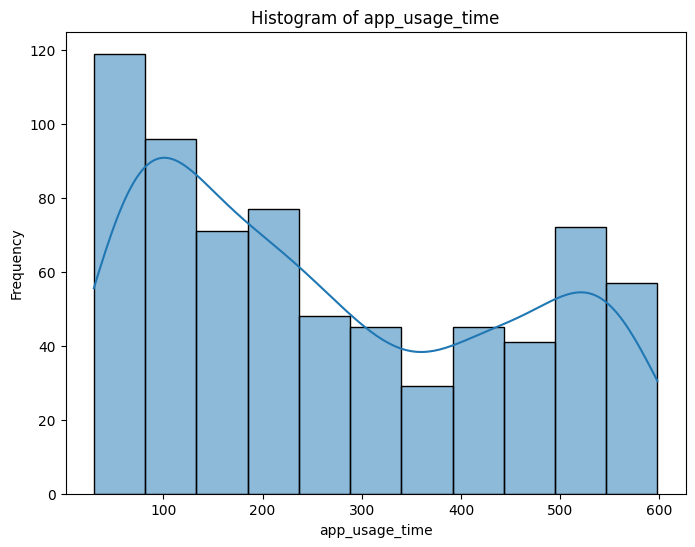

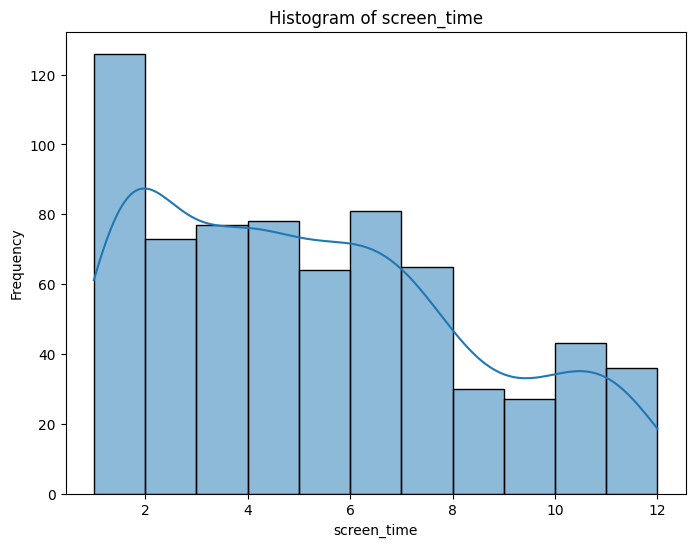

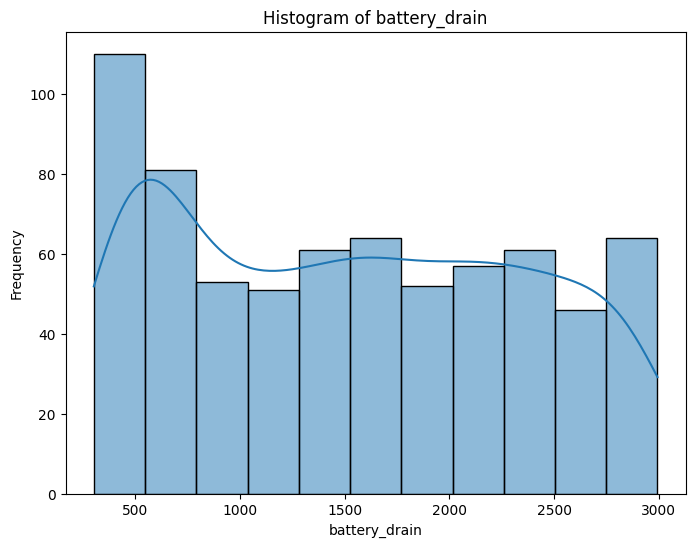

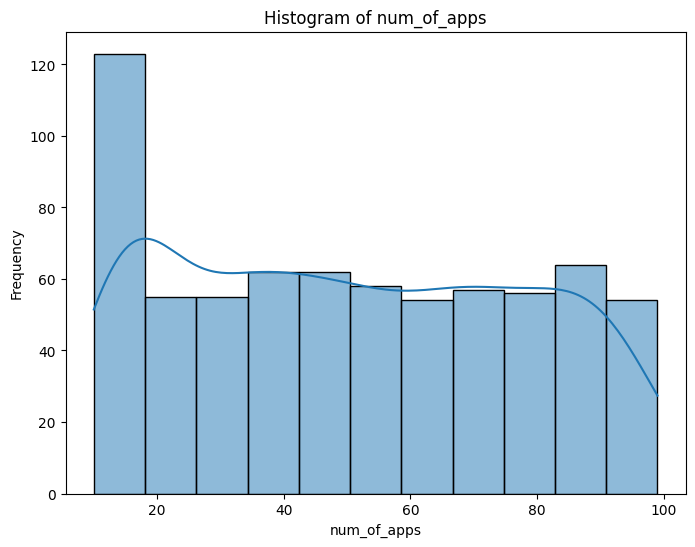

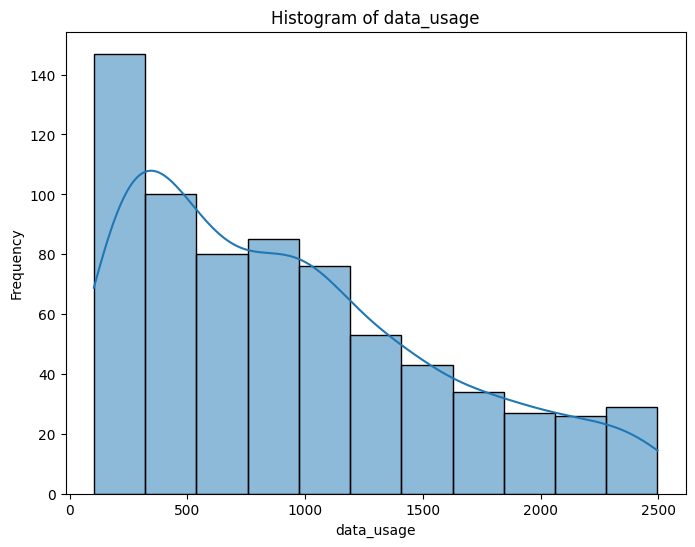

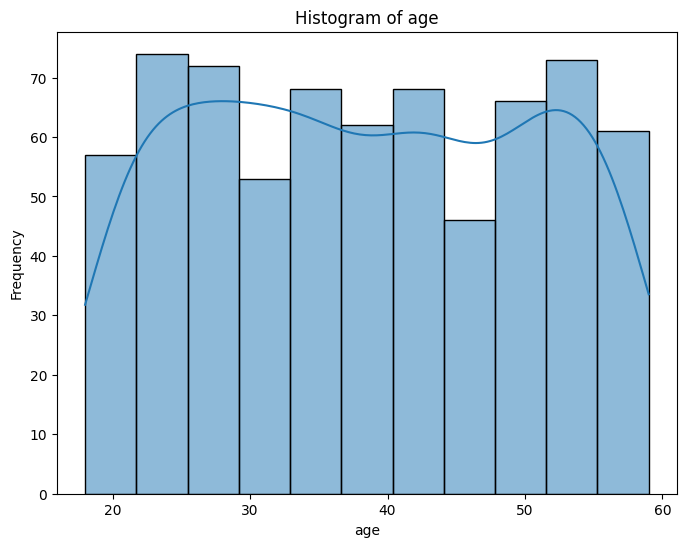

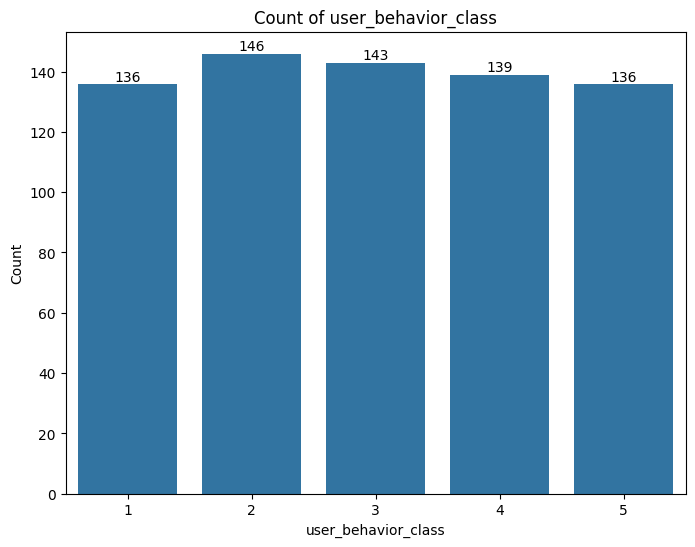

In [112]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(data[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=data)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()